In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")


In [2]:
# Separate numerical and categorical columns
numerical = df.select_dtypes(include=[np.number])
categorical = df.select_dtypes(include=[object])

In [3]:
X_df = numerical.drop("total_claim_amount", axis = 1)

X = X_df
y = df["total_claim_amount"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [7]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

model = lm.fit(X_train_scaled, y_train)

In [8]:
model.coef_

array([-7.86172127e+01, -1.22106613e+02,  1.29382217e+03,  4.41837395e-01,
       -1.06768836e+01,  1.59304967e+00,  8.02921718e+00])

In [9]:
model.intercept_

322.69400522001615

In [10]:
X_test_scaled = scaler.transform(X_test)

In [11]:
y_pred = model.predict(X_test_scaled)

In [12]:
residuals = np.array(y_test - y_pred)

In [13]:
res_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred, "residuals": residuals})

In [14]:
res_df.head()

,y_test,y_pred,residuals
3487,120,230.080624,-110.080624
668,660,559.062818,100.937182
10315,244,340.972244,-96.972244
5332,86,268.949617,-182.949617
1523,1032,1104.937431,-72.937431


In [15]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_pred)

48603.25525355552

In [16]:
rmse = np.sqrt(mse(y_test,y_pred))
rmse

220.4614597918546

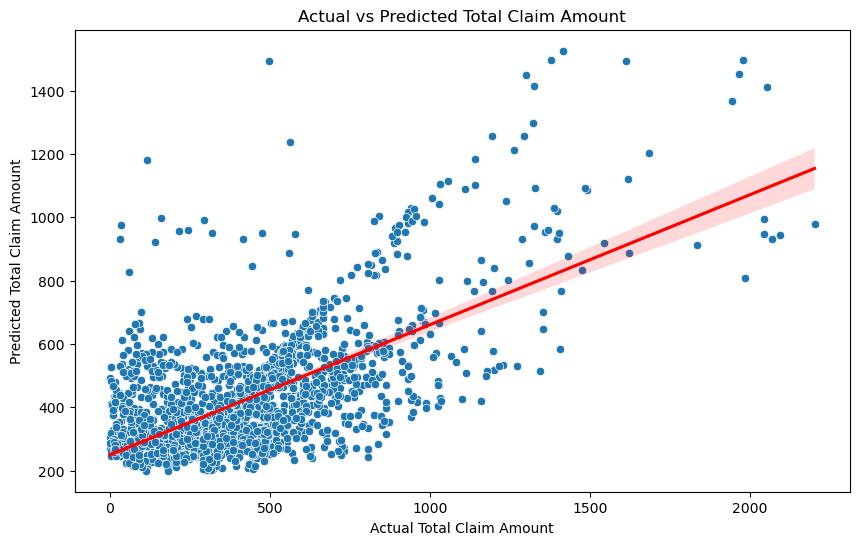

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red') 
plt.xlabel('Actual Total Claim Amount')
plt.ylabel('Predicted Total Claim Amount')
plt.title('Actual vs Predicted Total Claim Amount')
plt.show()